In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import pandas as pd
from country_list import countries_for_language
from src.data.some_dataloader import *
from collections import defaultdict
import matplotlib.pyplot as plt

In [13]:
def country_occurences_in_files():
    countries = list(dict(countries_for_language('en')).values())

    counts = defaultdict(dict)

    for file_ in plaintext_files_iterator():
        filename = os.path.splitext(file_.split('/')[-1])[0]
        with open(file_, 'r') as f:
            content = f.read()
            
            for country in countries:
                counts[country][filename] = content.count(country)
                
    df = pd.DataFrame(counts)
    return df

In [14]:
country_data = country_occurences_in_files()
country_data.head()

,Afghanistan,Åland Islands,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica,Antigua & Barbuda,...,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Wallis & Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
%C3%85land,0,16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
%C3%89douard_Manet,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
%C3%89ire,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
%C3%93engus_I_of_the_Picts,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
def filter_top_k(df, k, N):
    filtered_df = pd.DataFrame(index=df.index, columns=[f"Top_{i+1}_name" for i in range(k)] + [f"Top_{i+1}_count" for i in range(k)])
    
    for row in df.iterrows():
        filename = row[0]
        data = row[1]
        top_counts = data.sort_values(ascending=False)
        
        top_countries = top_counts[top_counts > N].head(k)
        top_countries_name = top_countries.index.tolist()

        
        for i, country in enumerate(top_countries_name):
            filtered_df.loc[filename, f"Top_{i+1}_name"] = country
            
        for i, country in enumerate(top_countries):
            filtered_df.loc[filename, f"Top_{i+1}_count"] = country
        
    return filtered_df
                
counts = filter_top_k(country_data, k=3, N=1)
counts

,Top_1_name,Top_2_name,Top_3_name,Top_1_count,Top_2_count,Top_3_count
%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Ireland,Isle of Man,NaN,8,4,NaN
%C3%85land,Finland,Åland Islands,Sweden,36,16,12
%C3%89douard_Manet,Italy,France,NaN,2,2,NaN
%C3%89ire,Ireland,Canada,United Kingdom,43,4,2
%C3%93engus_I_of_the_Picts,Ireland,NaN,NaN,9,NaN,NaN
...,...,...,...,...,...,...
Zirconium,India,NaN,NaN,2,NaN,NaN
Zoroaster,Iran,Tajikistan,NaN,15,3,NaN
Zuid-Gelders,Netherlands,Germany,NaN,2,2,NaN
Zulu,South Africa,Zimbabwe,Mozambique,15,3,2


In [16]:
df_cleaned = counts.dropna(how='all')
df_cleaned

,Top_1_name,Top_2_name,Top_3_name,Top_1_count,Top_2_count,Top_3_count
%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Ireland,Isle of Man,NaN,8,4,NaN
%C3%85land,Finland,Åland Islands,Sweden,36,16,12
%C3%89douard_Manet,Italy,France,NaN,2,2,NaN
%C3%89ire,Ireland,Canada,United Kingdom,43,4,2
%C3%93engus_I_of_the_Picts,Ireland,NaN,NaN,9,NaN,NaN
...,...,...,...,...,...,...
Zion_National_Park,United States,India,NaN,3,3,NaN
Zirconium,India,NaN,NaN,2,NaN,NaN
Zoroaster,Iran,Tajikistan,NaN,15,3,NaN
Zuid-Gelders,Netherlands,Germany,NaN,2,2,NaN


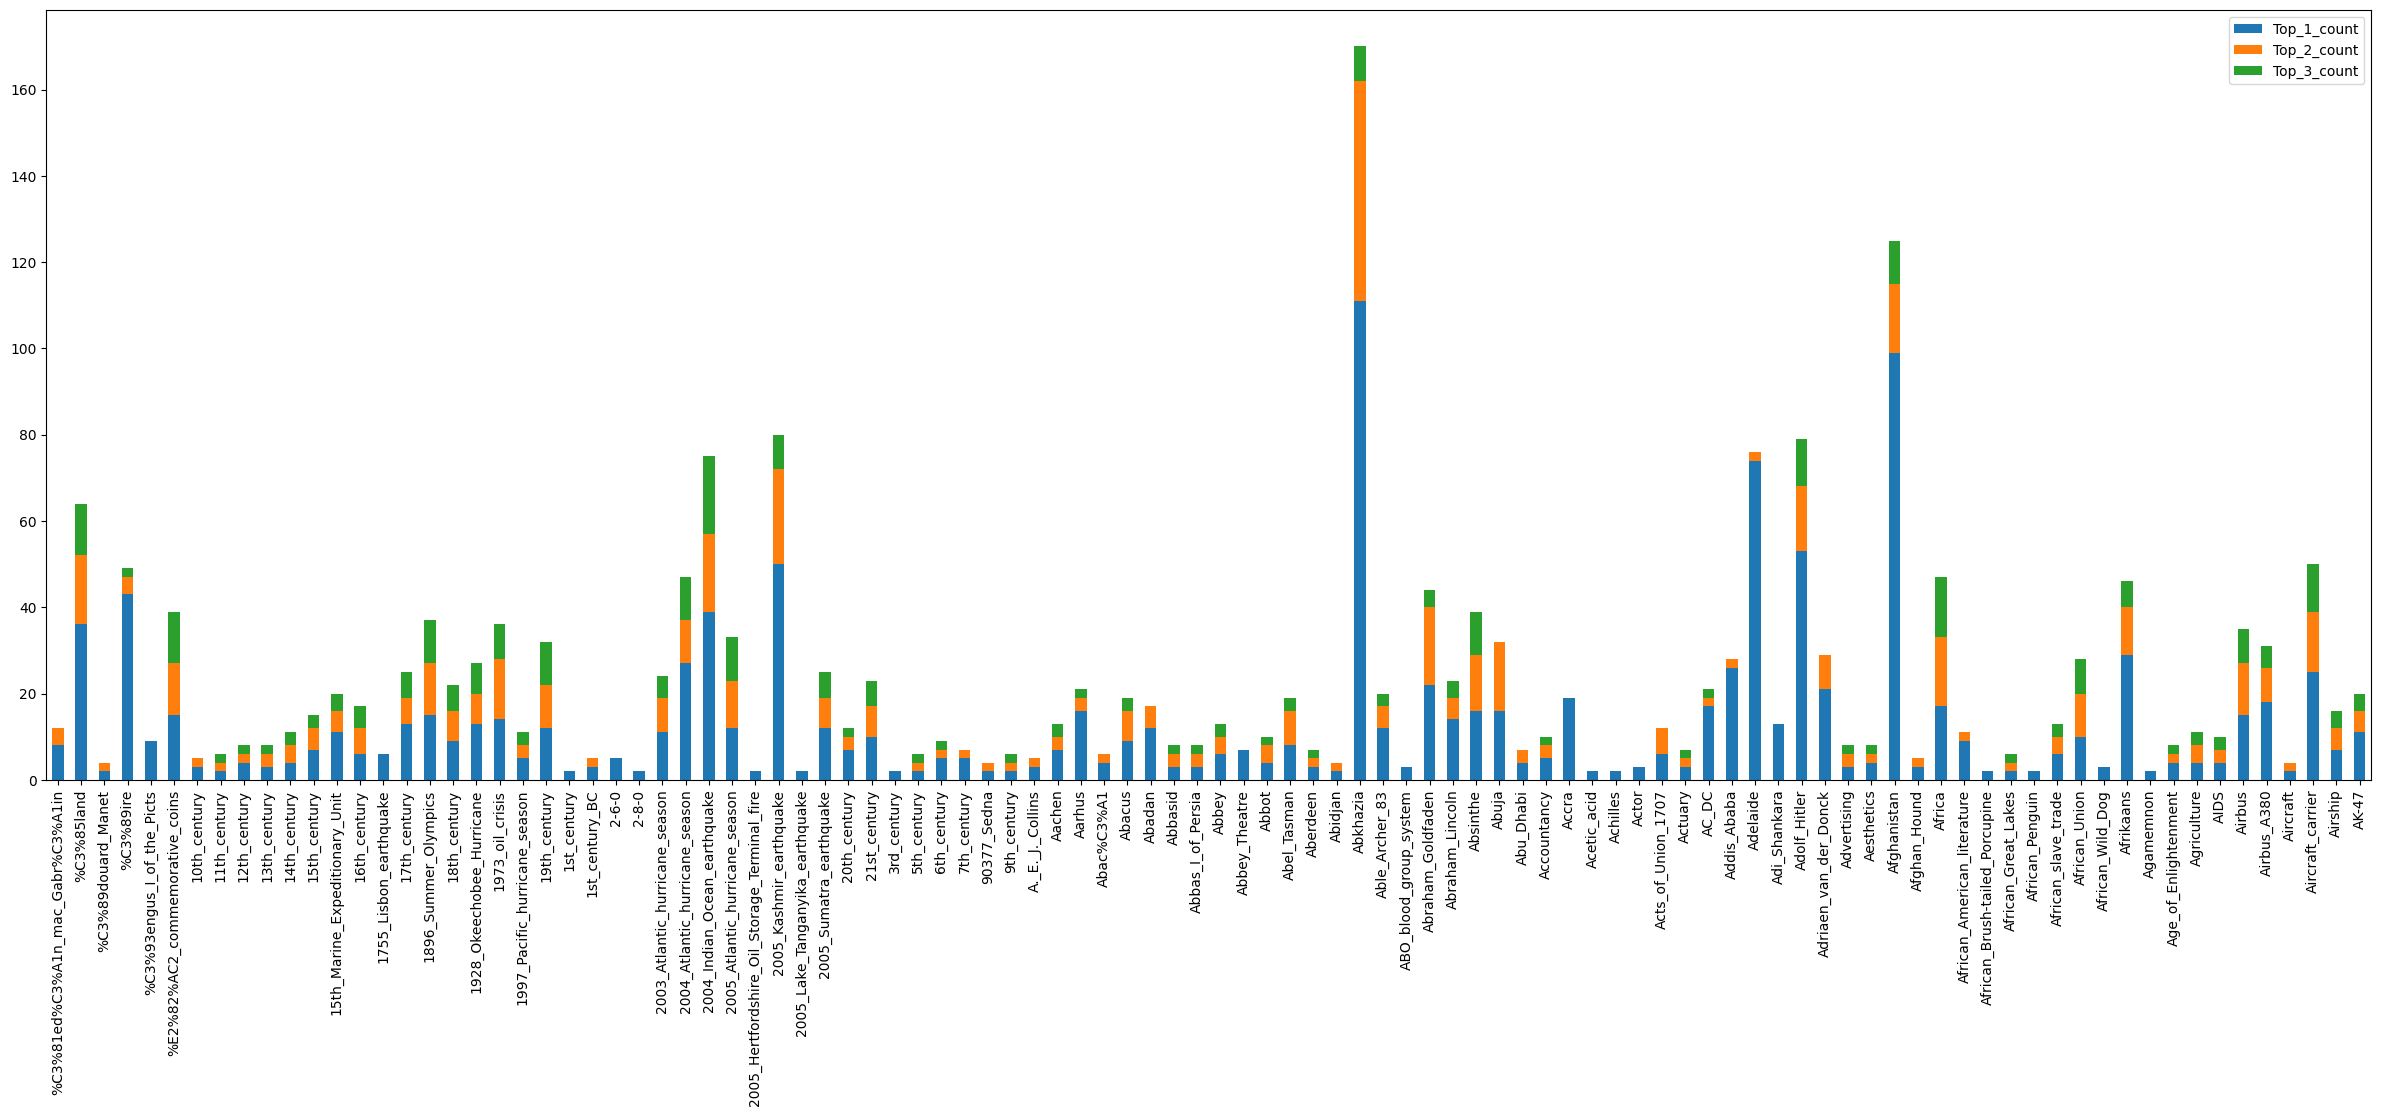

In [17]:
df_cleaned.head(100).plot(kind='bar', stacked=True, figsize=(30, 10))

plt.xticks(fontsize=10)

plt.show()

In [18]:
import plotly.express as px
#df_cleaned = df_cleaned.reset_index()
df_cleaned["Top_1_count"] = pd.to_numeric(df_cleaned["Top_1_count"])

fig = px.scatter_geo(df_cleaned, locations="Top_1_name", locationmode="country names",
                     size="Top_1_count", projection="robinson", hover_data={"index": True, "Top_1_name": True, "Top_1_count": True},
                     title = "Map of the Top1 Country for every article")

fig.show()

C:\Users\fricl\AppData\Local\Temp\ipykernel_28424\3627078610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Top_1_count"] = pd.to_numeric(df_cleaned["Top_1_count"])


ValueError: Value of 'hover_data_0' is not the name of a column in 'data_frame'. Expected one of ['Top_1_name', 'Top_2_name', 'Top_3_name', 'Top_1_count', 'Top_2_count', 'Top_3_count'] but received: index
 To use the index, pass it in directly as `df.index`.

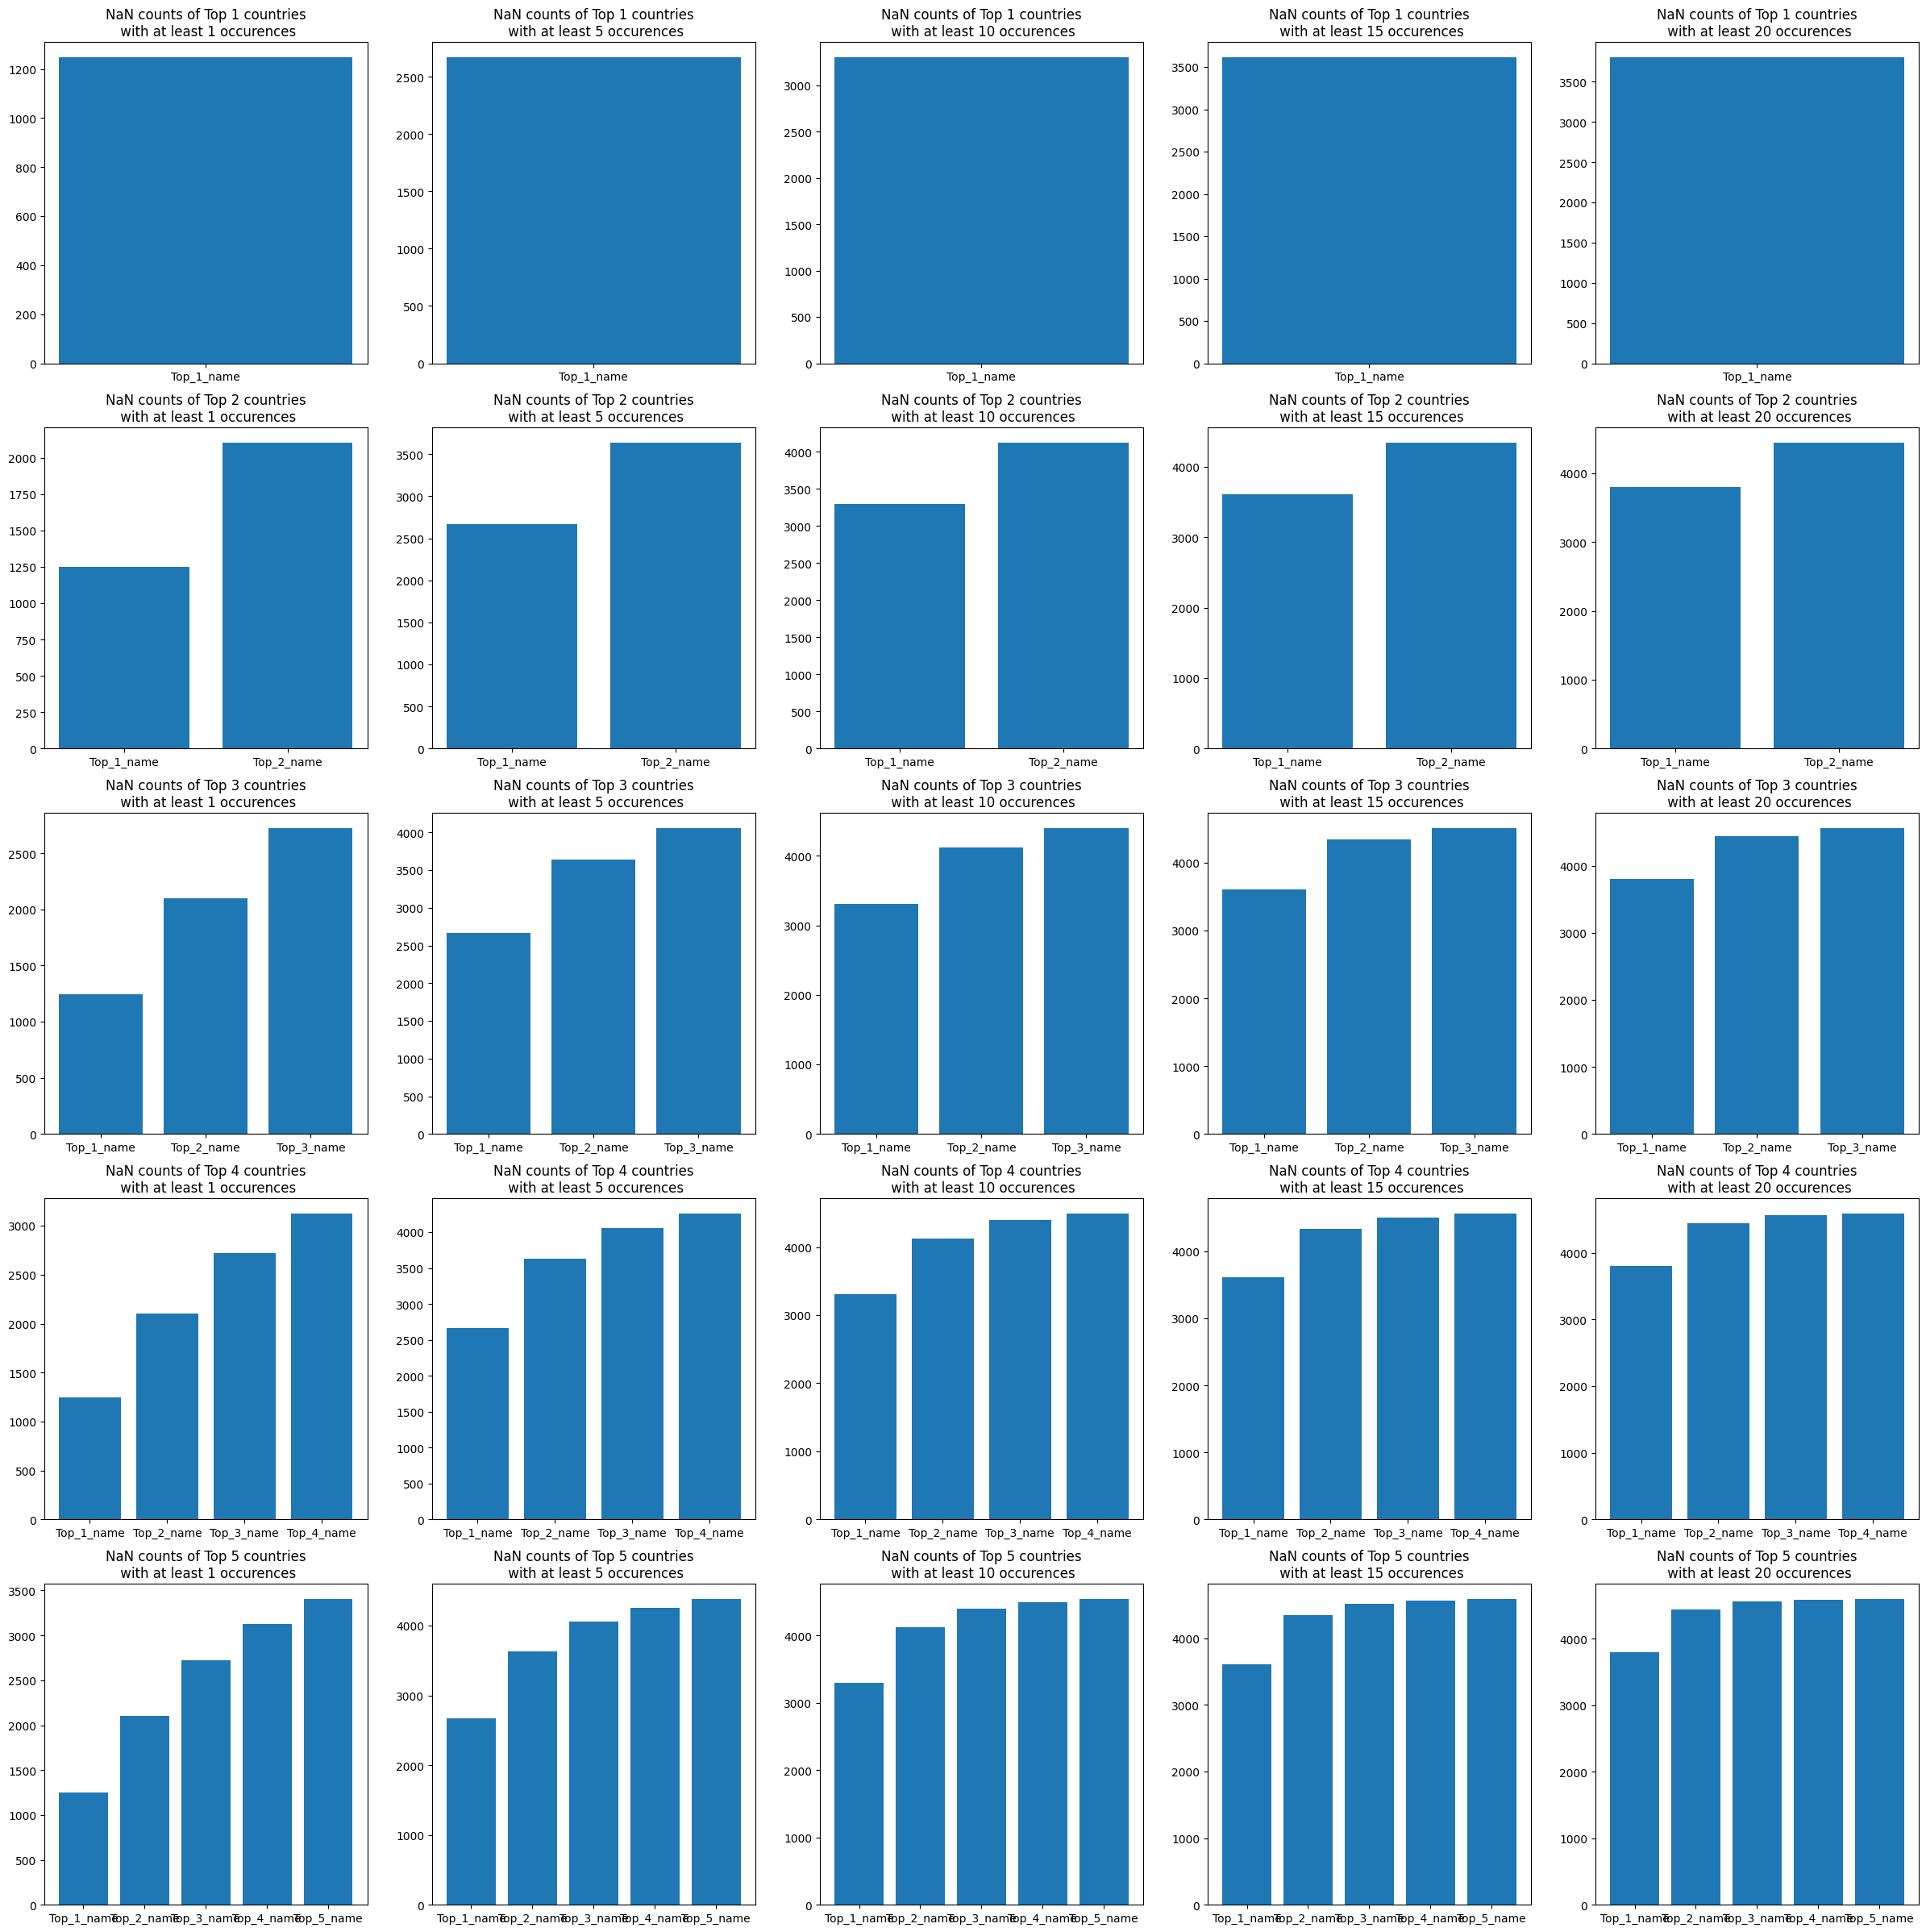

In [19]:
k_samples = [1, 2, 3, 4, 5]
N_samples = [1, 5, 10, 15, 20]

fig, axs = plt.subplots(len(k_samples), len(N_samples), figsize=(30, 30))

for i, k in enumerate(k_samples):
    for j, N in enumerate(N_samples):
        counts = filter_top_k(country_data, k=k, N=N)
        df_cleaned = counts.iloc[:, :k]
        df_stat = df_cleaned.isna().sum()
        axs[i, j].bar(df_stat.index, df_stat)
        axs[i, j].set_title(f"NaN counts of Top {k} countries\n with at least {N} occurences")


In [20]:
df_to_save = filter_top_k(country_data, k=2, N=1)
df_to_save.to_csv('data/country_occurences.csv')
